<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Raisins Classification with Logistic Regression </b></div>

<div style="text-align: center;">
    <img src="https://saynasafir.com/wp-content/uploads/2021/08/poster-3.jpg" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:700/1*VKOyjAsJtaR5fY_ENnampQ.jpeg" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

<a id="6.1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Import Libraries</b></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

C:\Users\jaina\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jaina\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


<a id="6.2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Data Analysis</b></div>

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
df.describe()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.509000  
75%    108375.750000    0.734991  1308.389750  
max    278217.000000    0.835455  2697.753000

In [5]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

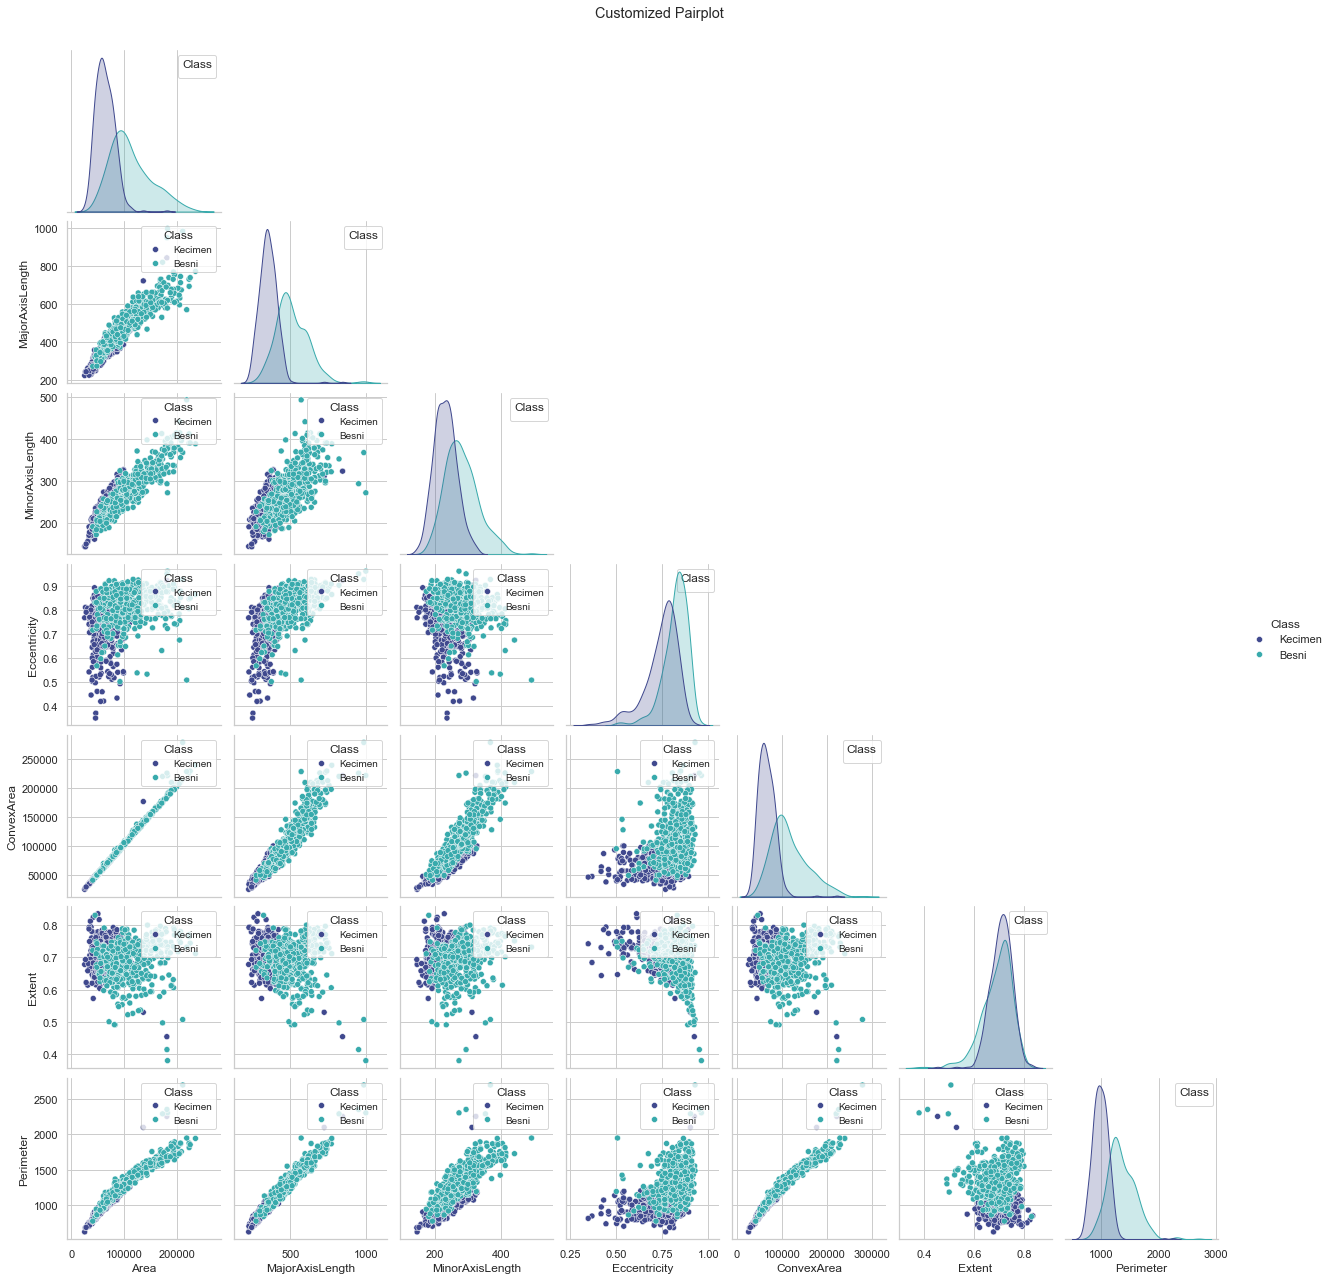

In [6]:
sns.set(style='whitegrid') 
palette = 'viridis' 
pairplot = sns.pairplot(data=df, corner=True, hue='Class', palette='mako')

pairplot.fig.suptitle('Customized Pairplot', y=1.02)  
pairplot._legend.set_title('Class') 

for ax in pairplot.axes.flat:
    if ax is not None:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles[:2], labels=labels[:2], loc='upper right', title='Class', fontsize='small', title_fontsize='medium')


plt.show()

In [7]:
df=pd.get_dummies(df, columns=['Class'], drop_first=True)
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class_Kecimen  
0    0.758651   1184.040           True  
1    0.684130   1121.786           True  
2    0.637613   1208.575           True  
3    0.699599    844.162           True  
4    0.792772   1073.251           True  
..        ...        ...            ...  
895  0.668793   1129.072          False  
896  0.636476   1214.252          False  
897  0.741099   1292.828          False  
898  0.658798   1258.548          False  
899  0.632020   1272.862          False  

[900 rows x 8 columns]

In [8]:
target=df['Class_Kecimen']
target

0       True
1       True
2       True
3       True
4       True
       ...  
895    False
896    False
897    False
898    False
899    False
Name: Class_Kecimen, Length: 900, dtype: bool

In [9]:
target=target.astype(int)
target

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: Class_Kecimen, Length: 900, dtype: int32

In [10]:
df['Class_Kecimen']=df['Class_Kecimen'].astype(int)
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class_Kecimen  
0    0.758651   1184.040              1  
1    0.684130   1121.786              1  
2    0.637613   1208.575              1  
3    0.699599    844.162              1  
4    0.792772   1073.251              1  
..        ...        ...            ...  
895  0.668793   1129.072              0  
896  0.636476   1214.252              0  
897  0.741099   1292.828              0  
898  0.658798   1258.548              0  
899  0.632020   1272.862              0  

[900 rows x 8 columns]

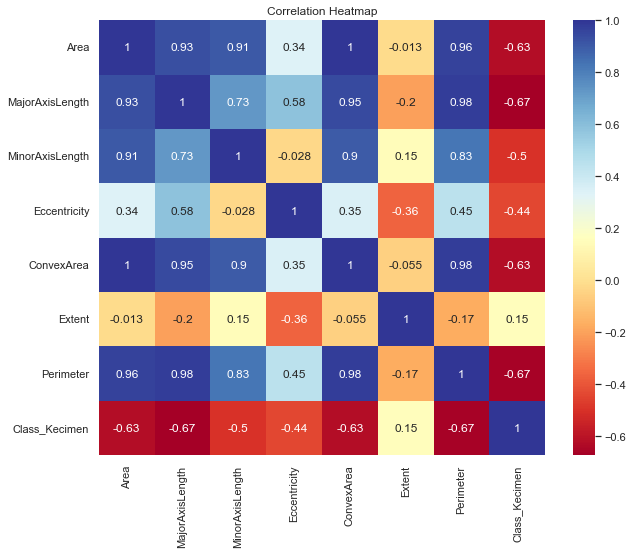

In [11]:
# Compute the correlation matrix
corr_matrix = df.select_dtypes('number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='RdYlBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

<a id="6.3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Data Pre-Processsing</b></div>

In [12]:
Selected_features=corr_matrix.index[abs(corr_matrix['Class_Kecimen'])>=0.6].tolist()
Selected_features.remove('Class_Kecimen')   
Selected_features

['Area', 'MajorAxisLength', 'ConvexArea', 'Perimeter']

In [13]:
y=target
x=df[Selected_features]

In [14]:
x

Area  MajorAxisLength  ConvexArea  Perimeter
0    87524       442.246011       90546   1184.040
1    75166       406.690687       78789   1121.786
2    90856       442.267048       93717   1208.575
3    45928       286.540559       47336    844.162
4    79408       352.190770       81463   1073.251
..     ...              ...         ...        ...
895  83248       430.077308       85839   1129.072
896  87350       440.735698       90899   1214.252
897  99657       431.706981      106264   1292.828
898  93523       476.344094       97653   1258.548
899  85609       512.081774       89197   1272.862

[900 rows x 4 columns]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="6.4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Build Model</b></div>

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
logistic_regression_model.coef_ 

array([[ 0.33746573, -1.93397134,  0.49339801, -1.90983669]])

In [20]:
logistic_regression_model.intercept_

array([-0.4311251])

In [21]:
y_pred = logistic_regression_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1])

In [22]:
score = logistic_regression_model.score(X_test_scaled, y_test)
score

0.85

<a id="6.5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Model Evaluation</b></div>

Logistic Regression Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85        86
           1       0.88      0.83      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180





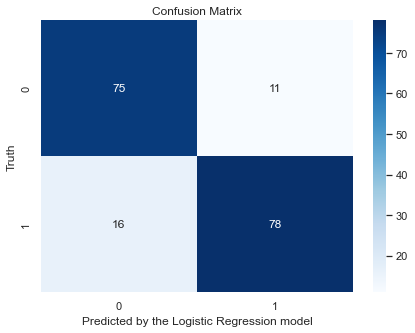

In [23]:
y_pred = logistic_regression_model.predict(X_test_scaled)

# Calculate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)

model_evaluation_metrics = {}
model_evaluation_metrics['Logistic Regression'] = {
    "Confusion Matrix": cm,
    'Classification Report': classif_report
}

print(f"Logistic Regression Evaluation Metrics:")
print("\nClassification Report:")
print(classif_report)
print("\n" + "="*60 + "\n")

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')  # Using 'Blues' colormap
plt.xlabel('Predicted by the Logistic Regression model')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Improve from 85% to 90% 

1. Perform Outlier Analysis.
2. Try with all feature and use if possible, backward elimination 
3. Try other algorithms, DT, KNN, SVM

<a id="7"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#EC7063; overflow:hidden"><b> Conclusion 📝</b></div>

Logistic regression is advantageous in classification tasks due to its simplicity, interpretability, and efficiency. It provides probabilistic outputs, making it easy to understand and implement. Additionally, it handles binary and multiclass classification, making it versatile for various applications.